<a href="https://colab.research.google.com/github/rsmondejar/viu_aprendizaje_supervisado/blob/main/tema1/aprendizaje_supervisado_tema1_limpieza_datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/logo_viu.png?raw=true" align="left" hspace="10px" vspace="0px"></p>

<h1> Asignatura de Inteligencia Artificial</h1>


La presente asignatura hace parte del máster oficial en Inteligencia Artificial, impartido en la Universidad Internacional de Valencia (VIU).

<p><a name="contents"></a></p>

# Contenido Sesión 6: Introducción al Machine Learning:

- <a href="#sklearn">1. Introducción a Scikit-Learn</a><br>
  - <a href="#sklearnG">1.1. Generalidades</a><br>
  - <a href="#sklearnT">1.2. Tratamiento/limpieza de datos</a><br>
    - <a href="#norm">1.2.1. Normalización</a><br>
    - <a href="#std">1.2.2. Estandarización</a><br>
- <a href="#deteccion_de_outliers">2. Detección de outliers</a><br>
  - <a href="#ellipticEnvelope">2.1. Método de envolvente elíptica</a><br>
  - <a href="#otros_metodos_outliers">2.2. Otros métodos de detección de outliers</a><br>
  - <a href="#boxplots">2.3. Métodos de Boxplots/Cajas y Bigotes.</a><br>


  


<p><a name="sklearn"></a></p>

# 1. Introducción a Scikit-Learn

[Contenidos](#contents)




<p><a name="sklearnG"></a></p>

## 1.1. Generalidades

[Contenidos](#contents)


Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Una de las más conocidos es **Scikit-Learn**, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro.

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)


<p><a name="sklearnT"></a></p>

## 1.2. Tratamiento/limpieza de datos

[Contenidos](#contents)



En Machine Learning (ML), se trata de crear modelos a partir de datos, en donde estos debe ser presentados de forma adecuada según el algoritmo usado.

Para los casos de algoritmos se basan en distancias, pesos asociados a características, etc, es necesario proceder a **normalizar** o **estandarizar** los datos. La *normalización* se lleva a cabo en aquellos algoritmos de machine learning que no se presupone una distribución de los datos. Por el contrario, la *estandarización* se debe llevar a cabo en aquellos casos en que los algoritmos de machine learning presuponen que los datos sigue una distribución normal.

Los algoritmos de ML no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes (o en algunos casos las entradas deben estar normalizadas/estandarizadas).

---
**¡IMPORTANTE!**

Cuando se divide un conjunto de datos en `train`y `test`, se debe normalizar o estandarizar los datos usando el conjunto de `train`, y realizar la transformación sobre el grupo de `test` usando el `estimador` definido para el grupo de `train`.

---

Veamos como llevar a cabo estos dos métodos en python.

<p><a name="norm"></a></p>

### 1.2.1. Normalización de características

[Contenidos](#contents)

En la normalización, los datos sufren la siguiente transformación:

$$ x'=\frac{x-x_{min}}{x_{max}-x_{min}}.$$

en donde, los valores finales de cada una de las características estarán definidos en el rango $[0,1]$.

Veamos un ejemplo a continuación de como normalizar un conjunto de datos.

In [1]:
from sklearn import preprocessing
import numpy as np

In [2]:
# Carga de datos.
X_train = np.array([[ 1., -4.,  5.],
                    [ 5.,  0.,  2.],
                    [ 0.,  6., -3.]])

print(X_train)

[[ 1. -4.  5.]
 [ 5.  0.  2.]
 [ 0.  6. -3.]]


In [3]:
# Limpieza de datos: normalización.
normalizer = preprocessing.MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)

In [4]:
# Salida de resultados.
print(X_train_norm)

[[0.2   0.    1.   ]
 [1.    0.4   0.625]
 [0.    1.    0.   ]]


In [5]:
# Ejemplo para ver que los resultados son iguales si aplicamos los métodos "fit" y "transform" por separado
X_train_2 = np.copy(X_train)

# Crea un objeto "fitted_normalizer" llamando al método "fit"
f = normalizer.fit(X_train_2)

# Aplica el objeto sobre los datos "X_train_2" para obtener "X_train_norm_2"
X_train_norm_2 = f.transform(X_train_2)

# Comprueba si "X_train_norm" y "X_train_norm_2" son iguales
print(np.array_equiv(X_train_norm, X_train_norm_2))

True


**Ejercicio**

In [6]:
# Normalizar un nuevo conjunto de datos de test (SOLO HAY QUE APLICAR EL MÉTODO "transform", NO EL "fit")
X_test = np.array([[ 1., -3.,  2.],
                    [ 3.,  0.,  0.],
                    [ 0.,  4., -1.]])

In [7]:
normalizer.transform(X_test)

array([[0.2  , 0.1  , 0.625],
       [0.6  , 0.4  , 0.375],
       [0.   , 0.8  , 0.25 ]])

<p><a name="std"></a></p>

### 1.2.2. Estandarización

[Contenidos](#contents)

En la estandarización, los datos sufren la siguiente transformación:

$$x'=\frac{x-\bar x}{\sigma}$$

siendo

- $\bar x$ la media de los datos
- $\sigma$ la desviación típica/estandar de los datos

Veamos como llevar a cabo este proceso en python.

In [8]:
from sklearn import preprocessing
import numpy as np

In [9]:
# Carga de datos.
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

**Ejercicio**

In [14]:
# Limpieza de datos: estandarización.
standardizer = preprocessing.StandardScaler()

# Estandarizamos los datos de entrenamiento
# ???

In [31]:
standardizer.fit(X_train)

StandardScaler()

In [ ]:
standardizer.mean_

In [17]:
standardizer.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [32]:
X_train_std = standardizer.transform(X_train)

In [33]:
X_train_std

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [41]:
np.mean(X_train, axis=0)

array([1.        , 0.        , 0.33333333])

In [43]:
np.std(X_train, axis=0)

array([0.81649658, 0.81649658, 1.24721913])

**Ejercicio**

In [34]:
X_train_2 = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [37]:
# Aplicamos los métodos "fit" y "transform" por separado
# ???
# ???
standardizer.fit(X_train_2)
X_train_2_std = standardizer.transform(X_train_2)

In [39]:
# Aplicamos los métodos "fit" y "transform" juntos
X_train_2_std = standardizer.fit_transform(X_train_2)

In [44]:
# Comprobar si las matrices estandarizadas son iguales
# ???
np.array_equal(X_train, X_train_2)

True

In [29]:
np.mean(X_train_2, axis=0)

array([2.        , 0.66666667, 1.33333333])

In [27]:
np.std(X_train_2, axis=0)

array([2.1602469 , 4.10960934, 3.29983165])

<p><a name="deteccion_de_outliers"></a></p>

# 2. Detección de outliers

[Contenidos](#contents)

La detección de outliers tiene como fin la eliminación de aquellas instacias de un dataset que represantan valores anómalos. Si incluimos dichos valores anómalos, podremos incurrir en el entrenamiento de modelos que incluyan los casos atípicos como "normales" (esta frase necesita discusión y ser razonada en profundidad).

A continuación veremos los siguiente métodos para la detección de outliers:

- Método de envolvente elíptica
- Otros métodos de detección de outliers
- Método de boxplots/cajas y bigotes

In [45]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [46]:
# Carga de datos.
df = pd.read_csv("https://raw.githubusercontent.com/ssanchezgoe/viu_aprendizaje_supervisado/main/datasets/outliers.csv")
df

,a,b
0,0.149014,-0.041479
1,0.194307,0.456909
2,-0.070246,-0.070241
3,0.473764,0.230230
4,-0.140842,0.162768
...,...,...
195,-5.114441,0.646251
196,5.631630,0.277174
197,1.552784,2.348984
198,-0.545507,1.530697


<p><a name="ellipticEnvelope"></a></p>

## 2.1. Método de envolvente elíptica

[Contenidos](#contents)

In [47]:
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)
outlier_method = algorithm.fit(df)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0]
print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]

Outliers en la posición: 
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]

Número de outliers: 
 50


In [48]:
# @title ##**Ejercicio**: Crear una función que, a partir de un dataframe "df" y un algoritmo "algorithm", devuelva la matriz y la posición de los outliers.

def find_outliers(df, algorithm):

  outlier_method = algorithm.fit(df)
  df_outliers = outlier_method.predict(df)

  pos_outliers = np.where(df_outliers==-1)[0]
  print('\nOutliers en la posición: \n', pos_outliers)

  # Determinar el número de outliers
  print('\nNúmero de outliers: \n', len(pos_outliers))

  return df_outliers, pos_outliers


<p><a name="otros_metodos_outliers"></a></p>

## 2.2. Otros métodos de detección de outliers

[Contenidos](#contents)

Existen métodos similares al de la envolvente que pueden ser consultados en el link de [algoritmos de detección de outliers de Sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html).

In [49]:
# @title ##**Ejercicio:** En base al ejercicio anterior, lleve a cabo una detección de outlier el dataframe "df" mediante cualquier de los métodos definidos en Sklean (IsolationForest, LocalOutlierFactor o OneClassSVM).

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

IF = IsolationForest()
# OC_SVM = ???
# LOF = ???

df_outliers, pos_outliers = find_outliers(df, IF)
print(len(pos_outliers))



Outliers en la posición: 
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]

Número de outliers: 
 50
50


<p><a name="boxplots"></a></p>

## 2.3. Método de Boxplots/Cajas y Bigotes

[Contenidos](#contents)

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0"></a>

En esta gráfica, podemos identificar las siguiente cantidades:

- 1. Mediana
- 2. Cuartil superior $P_{75}$
- 3. Cuartil inferior $P_{25}$
- 4. Rango intercuartil $IQR=P_{75}-P_{25}$
- 5. Extremo superior

$$UE = \begin{cases}
P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
\text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
\end{cases}$$

- 6. Extremo inferior

$$LE= \begin{cases}
P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)}
\\
\text{min(Data)} & \text{si } LO \le \text{min(Data)}
\end{cases}$$

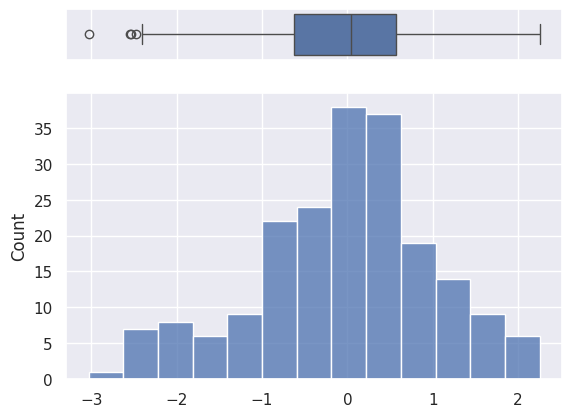

In [50]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
x = np.random.randn(200) # Distribución normal (gaussiana)

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(x, orient="h", ax=ax_box)
sns.histplot(x,  ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

**Código de detección de outlieres mediante boxplots**

limite inferior:  -1.0853060827395105
limite superior:  1.0119554520872196
Posición de outliers:  [150 153 154 157 159 160 162 165 168 169 171 172 174 175 177 178 181 184
 185 186 187 190 191 192 193 195 151 152 155 156 161 163 164 166 167 173
 176 179 180 182 188 189 196 197]
Número de outliers:  44


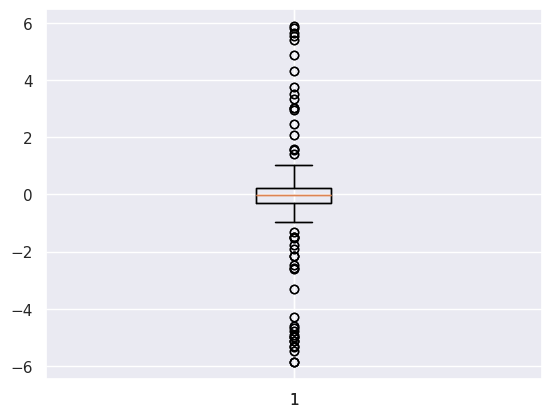

In [51]:
# Seleccionamos el atributo que vamos a medir
a = df['a']

# Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
Q1 = stats.scoreatpercentile(a, 25)
Q3 = stats.scoreatpercentile(a, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

# Observamos los límites inferior y superior
print('limite inferior: ', li)
print('limite superior: ', ls)

# Buscamos la posición de los outliers
pos_i = np.where(a<li)[0]
pos_s = np.where(a>ls)[0]
pos_outliers = np.concatenate((pos_i, pos_s))
print('Posición de outliers: ', pos_outliers)
print('Número de outliers: ', len(pos_outliers))

# Dibujamos el diagrama de caja y bigotes
prop = plt.boxplot(a)
plt.boxplot(a)
plt.show()

In [ ]:
# Definir una función que, dada una columna de un dataframe, devuelva la posición de los outliers según el método box plot
def find_limits_BP(variable):

    # ???

    return pos_outliers

In [ ]:
# Creamos un bucle for que estime los valores outliers de cada atributo
pos_outliers = []
for i in df.columns:
    variable =  # ???] # Atributo i
    pos_out = # ??? # Buscamos los outliers en esa variable con la función que hemos creado
    pos_out = np.expand_dims(pos_out, axis=1) # Extpandimos las dimensiones
    pos_outliers.append(pos_out) # Lo añadimos en una lista

In [ ]:
# Concatenamos todas las posiciones de outliers
po = np.vstack(pos_outliers)

# Vemos las posiciones de todos los outliers
pos_out = np.unique(po)
print('Posiciones de outliers totales: ', pos_out)

# Observamos el número de outliers
print('Numero de outliers totales: ', len(pos_out))